# Generalized Linear Models
Extend the linear-model framework to include dependent variables that are decidedly non-normal

You fit models of the form:

#### $g(\mu_{Y})=\beta_{0}+\sum_{j=1}^{p}\beta_{j}X_{j}$

* $g(\mu_{Y})$ is a function of the conditional mean (called the link function)
* You assume that Y follows a distribution that’s a member of the exponential family
* You specify the link function and the probability distribution, and the parameters are derived through an iterative maximum-likelihood-estimation procedure.

#### ```glm(formula, family=family(link=function), data=)```
![](fig5.png)

* Logistic regression is applied to situations in which the response variable is dichotomous (0 or 1). The model assumes that Y follows a binomial distribution and that you can fit a linear model

     ![](fig6.png)

* Poisson regression is applied to situations in which the response variable is the number of events to occur in a given period of time. The Poisson regression model assumes that Y follows a Poisson distribution and that you can fit a linear model

    ![](fig7.png)

# Example: Logistic regression
The infidelity data, known as Fair’s Affairs, is based on a cross-sectional survey conducted by Psychology Today in 1969 and is described in Greene (2003) and Fair (1978). It contains 9 variables collected on 601 participants and includes how often the respondent engaged in extramarital sexual intercourse during the past year, as well as their gender, age, years married, whether they had children, their religiousness (on a 5-point scale from 1=anti to 5=very), education, occupation (Hollingshead 7-point classification with reverse numbering), and a numeric self-rating of their marriage (from 1=very unhappy to 5=very happy).

In [22]:
install.packages("AER")

package 'AER' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nemo\AppData\Local\Temp\Rtmp0MnHvW\downloaded_packages


In [23]:
data(Affairs, package="AER")
summary(Affairs)

    affairs          gender         age         yearsmarried    children 
 Min.   : 0.000   female:315   Min.   :17.50   Min.   : 0.125   no :171  
 1st Qu.: 0.000   male  :286   1st Qu.:27.00   1st Qu.: 4.000   yes:430  
 Median : 0.000                Median :32.00   Median : 7.000            
 Mean   : 1.456                Mean   :32.49   Mean   : 8.178            
 3rd Qu.: 0.000                3rd Qu.:37.00   3rd Qu.:15.000            
 Max.   :12.000                Max.   :57.00   Max.   :15.000            
 religiousness     education       occupation        rating     
 Min.   :1.000   Min.   : 9.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:14.00   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :16.00   Median :5.000   Median :4.000  
 Mean   :3.116   Mean   :16.17   Mean   :4.195   Mean   :3.932  
 3rd Qu.:4.000   3rd Qu.:18.00   3rd Qu.:6.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :20.00   Max.   :7.000   Max.   :5.000  

In [24]:
table(Affairs$affairs)


  0   1   2   3   7  12 
451  34  17  19  42  38 

You can see that that 52% of respondents were female, that 72% had children, and that the median age for the sample was 32 years. With regard to the response variable, 75% of respondents reported not engaging in an infidelity in the past year (451/601). The largest number of encounters reported was 12 (6%).

Although the number of indiscretions was recorded, your interest here is in the binary outcome (had an affair/didn’t have an affair).

In [25]:
Affairs$ynaffair[Affairs$affairs > 0] <- 1
Affairs$ynaffair[Affairs$affairs == 0] <- 0

In [26]:
Affairs$ynaffair <- factor(Affairs$ynaffair,
levels=c(0,1),
labels=c("No","Yes"))

In [27]:
table(Affairs$ynaffair)


 No Yes 
451 150 

In [28]:
fit.full <- glm(ynaffair ~ gender + age + yearsmarried + children +
religiousness + education + occupation +rating,
data=Affairs, family=binomial())

In [29]:
summary(fit.full)


Call:
glm(formula = ynaffair ~ gender + age + yearsmarried + children + 
    religiousness + education + occupation + rating, family = binomial(), 
    data = Affairs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5713  -0.7499  -0.5690  -0.2539   2.5191  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.37726    0.88776   1.551 0.120807    
gendermale     0.28029    0.23909   1.172 0.241083    
age           -0.04426    0.01825  -2.425 0.015301 *  
yearsmarried   0.09477    0.03221   2.942 0.003262 ** 
childrenyes    0.39767    0.29151   1.364 0.172508    
religiousness -0.32472    0.08975  -3.618 0.000297 ***
education      0.02105    0.05051   0.417 0.676851    
occupation     0.03092    0.07178   0.431 0.666630    
rating        -0.46845    0.09091  -5.153 2.56e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38 

From the p-values for the regression coefficients (last column), you can see that gender, presence of children, education, and occupation may not make a significant contribution to the equation (you can’t reject the hypothesis that the parameters are 0). 

Let’s fit a second equation without them and test whether this reduced model fits the data as well:

In [30]:
fit.reduced <- glm(ynaffair ~ age + yearsmarried + religiousness + rating, data=Affairs, family=binomial())
summary(fit.reduced)


Call:
glm(formula = ynaffair ~ age + yearsmarried + religiousness + 
    rating, family = binomial(), data = Affairs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6278  -0.7550  -0.5701  -0.2624   2.3998  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.93083    0.61032   3.164 0.001558 ** 
age           -0.03527    0.01736  -2.032 0.042127 *  
yearsmarried   0.10062    0.02921   3.445 0.000571 ***
religiousness -0.32902    0.08945  -3.678 0.000235 ***
rating        -0.46136    0.08884  -5.193 2.06e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38  on 600  degrees of freedom
Residual deviance: 615.36  on 596  degrees of freedom
AIC: 625.36

Number of Fisher Scoring iterations: 4


Each regression coefficient in the reduced model is statistically significant (p < .05). Because the two models are nested (fit.reduced is a subset of fit.full), you can use the anova() function to compare them. For generalized linear models, you’ll want a chi-square version of this test:

In [31]:
anova(fit.reduced, fit.full, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
596,615.3578,NA,NA,NA
592,609.5104,4,5.847418,0.2108367


The nonsignificant chi-square value (p = 0.21) suggests that the reduced model with four predictors fits as well as the full model with nine predictors, reinforcing your belief that gender, children, education, and occupation don’t add significantly to the prediction above and beyond the other variables in the equation.

# Interpreting the model parameters

In [32]:
coef(fit.reduced)

(Intercept)           age  yearsmarried religiousness        rating 
   1.93083017   -0.03527112    0.10062274   -0.32902386   -0.46136144

In a logistic regression, the response being modeled is the log(odds) that Y = 1. The regression coefficients give the change in log(odds) in the response for a unit change in the predictor variable, holding all other predictor variables constant. Because log(odds) are difficult to interpret, you can exponentiate them to put the results on an odds scale:

In [33]:
exp(coef(fit.reduced))

(Intercept)           age  yearsmarried religiousness        rating 
    6.8952321     0.9653437     1.1058594     0.7196258     0.6304248

* Now you can see that the odds of an extramarital encounter are increased by a factor of 1.106 for a one-year increase in years married (holding age, religiousness, and marital rating constant).
* If a one year increase in years married multiplies the odds of an affair by 1.106, a 10-year increase would increase the odds by a factor of 1.106^10, or 2.7, holding the other predictor variables constant.
* The odds of an extramarital affair are multiplied by a factor of 0.965 for every year increase in age.
* The odds of an extramarital affair increase with years married and decrease with age, religiousness, and marital rating.
* Because the predictor variables can’t equal 0, the intercept isn’t meaningful in this case.

# Assessing the impact of predictors on the probability of an outcome 
You can use the ```predict()``` function to observe the impact of varying the levels of a predictor variable on the probability of the outcome.
> The first step is to create an artificial dataset containing
the values of the predictor variables you’re interested in. Then you can use
this artificial dataset with the ```predict()``` function to predict the probabilities of the
outcome event occurring for these values.

**First, create an artificial dataset where age, years married, and religiousness are set to their means, and marital rating varies from 1 to 5:**

In [34]:
testdata <- data.frame(rating=c(1, 2, 3, 4, 5), age=mean(Affairs$age),
yearsmarried=mean(Affairs$yearsmarried),
religiousness=mean(Affairs$religiousness))
testdata

rating,age,yearsmarried,religiousness
1,32.48752,8.177696,3.116473
2,32.48752,8.177696,3.116473
3,32.48752,8.177696,3.116473
4,32.48752,8.177696,3.116473
5,32.48752,8.177696,3.116473


**Next, use the test dataset and prediction equation to obtain probabilities:**

In [35]:
testdata$prob <- predict(fit.reduced, newdata=testdata, type="response")
testdata

rating,age,yearsmarried,religiousness,prob
1,32.48752,8.177696,3.116473,0.5302296
2,32.48752,8.177696,3.116473,0.4157377
3,32.48752,8.177696,3.116473,0.3096712
4,32.48752,8.177696,3.116473,0.2204547
5,32.48752,8.177696,3.116473,0.1513079


From these results, you see that the probability of an extramarital affair decreases from 0.53 when the marriage is rated 1=very unhappy to 0.15 when the marriage is rated 5=very happy (holding age, years married, and religiousness constant).

**Now look at the impact of age:**

In [36]:
testdata <- data.frame(rating=mean(Affairs$rating),
age=seq(17, 57, 10),
yearsmarried=mean(Affairs$yearsmarried),
religiousness=mean(Affairs$religiousness))
testdata

rating,age,yearsmarried,religiousness
3.93178,17,8.177696,3.116473
3.93178,27,8.177696,3.116473
3.93178,37,8.177696,3.116473
3.93178,47,8.177696,3.116473
3.93178,57,8.177696,3.116473


In [37]:
testdata$prob <- predict(fit.reduced, newdata=testdata, type="response")
testdata

rating,age,yearsmarried,religiousness,prob
3.93178,17,8.177696,3.116473,0.3350834
3.93178,27,8.177696,3.116473,0.2615373
3.93178,37,8.177696,3.116473,0.1992953
3.93178,47,8.177696,3.116473,0.1488796
3.93178,57,8.177696,3.116473,0.1094738


> *Note:* There is a phenomenon known as Overdispersion that occurs when the observed variance of the response variable is larger than what would be expected from a binomial distribution. Overdispersion can lead to distorted test standard errors and inaccurate tests of significance.

# Example: Poisson Regression
Poisson regression is useful when you’re predicting an outcome variable representing counts from a set of continuous and/or categorical predictor variables.


We’ll consider the impact of an antiepileptic drug treatment on the number of seizures occurring over an eight-week period following the initiation of therapy.

Data were collected on the age and number of seizures reported by patients suffering from simple or complex partial seizures during an eight-week period before, and eight-week period after, randomization into a drug or placebo condition.

* SumY (the number of seizures in the eight-week period post-randomization) is the response variable.
* Treatment condition (Trt), age in years (Age), and number of seizures reported in the baseline eight-week period (Base) are the predictor variables. 
* The baseline number of seizures and age are included because of their potential effect on the response variable. 

We're interested in whether or not evidence exists that the drug treatment decreases the number of seizures after accounting for these covariates.

In [38]:
# install.packages("robust")

In [39]:
data(breslow.dat, package="robust")
names(breslow.dat)

[1] "ID"    "Y1"    "Y2"    "Y3"    "Y4"    "Base"  "Age"   "Trt"   "Ysum" 
[10] "sumY"  "Age10" "Base4"

In [40]:
summary(breslow.dat[c(6,7,8,10)])

      Base             Age               Trt          sumY       
 Min.   :  6.00   Min.   :18.00   placebo  :28   Min.   :  0.00  
 1st Qu.: 12.00   1st Qu.:23.00   progabide:31   1st Qu.: 11.50  
 Median : 22.00   Median :28.00                  Median : 16.00  
 Mean   : 31.22   Mean   :28.34                  Mean   : 33.05  
 3rd Qu.: 41.00   3rd Qu.:32.00                  3rd Qu.: 36.00  
 Max.   :151.00   Max.   :42.00                  Max.   :302.00  

Note that although there are 12 variables in the dataset, we’re limiting our attention to the 4 described earlier. Let’s look at the response variable in more detail:

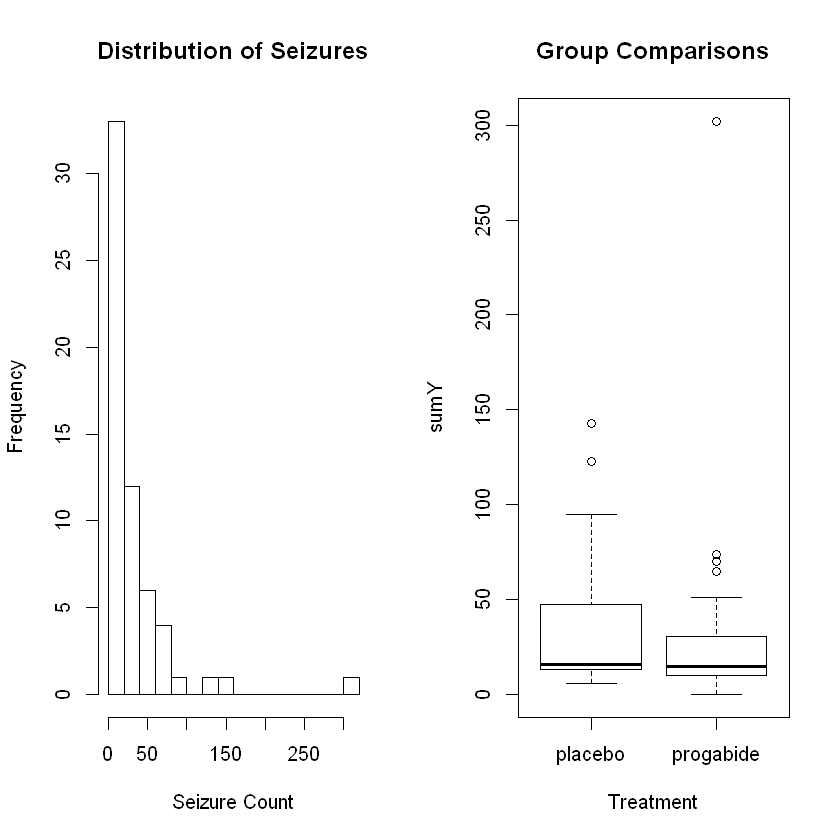

In [41]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1,2))
attach(breslow.dat)
hist(sumY, breaks=20, xlab="Seizure Count",
main="Distribution of Seizures")
boxplot(sumY ~ Trt, xlab="Treatment", main="Group Comparisons")
par(opar)

You can clearly see the skewed nature of the dependent variable and the possible presence of outliers. At first glance, the number of seizures in the drug condition appears to be smaller and has a smaller variance.

> Unlike standard OLS regression, this heterogeneity of variance isn’t a problem in Poisson regression

In [42]:
fit <- glm(sumY ~ Base + Age + Trt, data=breslow.dat, family=poisson())
summary(fit)


Call:
glm(formula = sumY ~ Base + Age + Trt, family = poisson(), data = breslow.dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0569  -2.0433  -0.9397   0.7929  11.0061  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9488259  0.1356191  14.370  < 2e-16 ***
Base          0.0226517  0.0005093  44.476  < 2e-16 ***
Age           0.0227401  0.0040240   5.651 1.59e-08 ***
Trtprogabide -0.1527009  0.0478051  -3.194   0.0014 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: 850.71

Number of Fisher Scoring iterations: 5


# Interpreting the model parameters

In [43]:
coef(fit)

(Intercept)         Base          Age Trtprogabide 
  1.94882593   0.02265174   0.02274013  -0.15270095

* In a Poisson regression, the dependent variable being modeled is the log of the conditional mean $\log_{e}(λ)$. 
* The regression parameter $0.0227$ for Age indicates that a one year increase in age is associated with a 0.03 increase in the log mean number of seizures, holding baseline seizures and treatment condition constant.
* The intercept is the log mean number of seizures when each of the predictors equals 0. Because you can’t have a zero age and none of the participants had a zero number of baseline seizures, the intercept isn’t meaningful in this case.

In [44]:
exp(coef(fit))

(Intercept)         Base          Age Trtprogabide 
   7.0204403    1.0229102    1.0230007    0.8583864

* Now you see that a one-year increase in age multiplies the expected number of seizures by 1.023, holding the other variables constant. This means that increased age is associated with higher numbers of seizures.
* A one-unit change in Trt (that is, moving from placebo to progabide) multiplies the expected number of seizures by 0.86.
* You’d expect a 20% decrease in the number of seizures for the drug group compared with the placebo group, holding baseline number of seizures and age constant.

> *Note:* In a Poisson distribution, the variance and mean are equal. Overdispersion occurs in Poisson regression when the observed variance of the response variable is larger than would be predicted by the Poisson distribution